In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
EPA = pd.read_csv('EPA_-_Percent_of_Residents_Earning_above_the_Asset_Limited__Income_Constrained__Employed__ALICE__Threshold_20240123.csv')
EPA.head()

,Year Start,Year End,Year,Pct earning above ALICE threshold,Race/Ethnicity
0,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.68,White
1,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.33,Black/AA
2,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.60,Asian
3,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.43,Two or More
4,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.39,Hispanic


In [3]:
GE = pd.read_csv('GE_-_Human_Resources_Employment_Data_20240122.csv')

In [5]:
for i in range(len(GE)):
    ###Turning the Date column in datetime objects and dropping the time
    GE.loc[i,'Date Reported'] = datetime.strptime(GE.loc[i,'Date Reported'][:10], "%m/%d/%Y").date()

In [6]:
GE.head()

,Date Reported,Fiscal Year,Department,Category,Sex,Race/Ethnicity,Value
0,2021-07-01,2021,Total,Turnover Rate,Total,Toatl,0.0796
1,2021-07-31,2021,Total,New Hires,Total,Total,102.0000
2,2014-06-30,2014,311 Customer Service,Total Employees,Female,Asian,0.0000
3,2014-06-30,2014,City Attorney,Total Employees,Female,Total,10.0000
4,2014-06-30,2014,311 Customer Service,Total Employees,Female,Black/African-American,1.0000


In [ ]:
### If you want to save the cleaned data uncomment the line below and run this cell
# GE.to_csv(GE_clean.csv)

In [7]:
## Load in Employment Stats
emp_stats = pd.read_csv('Employment_Statistics_20240127.csv')
emp_stats

,Name,Variable,Variable Code,Date,Value,Row ID,Geography ID,Geography Type,Location
0,"Kent County, MI",Employment,5,01/01/2013 12:00:00 AM,298364.0,LAUCN260810000000005_20130101,26081,county,POINT (-85.547446 43.032497)
1,"Kent County, MI",Employment,5,02/01/2013 12:00:00 AM,301651.0,LAUCN260810000000005_20130201,26081,county,POINT (-85.547446 43.032497)
2,"Kent County, MI",Employment,5,03/01/2013 12:00:00 AM,302103.0,LAUCN260810000000005_20130301,26081,county,POINT (-85.547446 43.032497)
3,"Kent County, MI",Employment,5,04/01/2013 12:00:00 AM,304720.0,LAUCN260810000000005_20130401,26081,county,POINT (-85.547446 43.032497)
4,"Kent County, MI",Employment,5,05/01/2013 12:00:00 AM,307792.0,LAUCN260810000000005_20130501,26081,county,POINT (-85.547446 43.032497)
...,...,...,...,...,...,...,...,...,...
1555,Michigan,Unemployment,4,02/01/2023 12:00:00 AM,220655.0,LAUST260000000000004_20230201,26,state,POINT (-85.660493 44.8441757)
1556,Michigan,Unemployment,4,03/01/2023 12:00:00 AM,198577.0,LAUST260000000000004_20230301,26,state,POINT (-85.660493 44.8441757)
1557,Michigan,Unemployment,4,04/01/2023 12:00:00 AM,140062.0,LAUST260000000000004_20230401,26,state,POINT (-85.660493 44.8441757)
1558,Michigan,Unemployment,4,05/01/2023 12:00:00 AM,186708.0,LAUST260000000000004_20230501,26,state,POINT (-85.660493 44.8441757)


In [8]:
#### Clean Employment Stats Data ####
emp_stats["Lat"] = [0.0]*len(emp_stats) ## Creating a Latitude Column
emp_stats['Long'] = [0.0]*len(emp_stats) ## Creating a Longitude Column

for i in range(len(emp_stats)):
    ###Turning the Date column in datetime objects and dropping the time
    emp_stats.loc[i,'Date'] = datetime.strptime(emp_stats.loc[i,'Date'][:10], "%m/%d/%Y").date()

    ###Turning the long and lat point into two new columns
    if emp_stats.loc[i,'Location'] == 'POINT (-85.547446 43.032497)':
        emp_stats.loc[i,'Long'] = -85.547446
        emp_stats.loc[i,'Lat'] = 43.032497
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.65557 42.961156)':
        emp_stats.loc[i,'Long'] = -85.65557
        emp_stats.loc[i,'Lat'] = 42.961156
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.660493 44.8441757)':
        emp_stats.loc[i,'Long'] = -85.660493
        emp_stats.loc[i,'Lat'] = 44.8441757
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.65557000000001 42.961156)':
        emp_stats.loc[i,'Long'] = -85.65557
        emp_stats.loc[i,'Lat'] = 42.961156

In [9]:
emp_stats.head()

,Name,Variable,Variable Code,Date,Value,Row ID,Geography ID,Geography Type,Location,Lat,Long
0,"Kent County, MI",Employment,5,2013-01-01,298364.0,LAUCN260810000000005_20130101,26081,county,POINT (-85.547446 43.032497),43.032497,-85.547446
1,"Kent County, MI",Employment,5,2013-02-01,301651.0,LAUCN260810000000005_20130201,26081,county,POINT (-85.547446 43.032497),43.032497,-85.547446
2,"Kent County, MI",Employment,5,2013-03-01,302103.0,LAUCN260810000000005_20130301,26081,county,POINT (-85.547446 43.032497),43.032497,-85.547446
3,"Kent County, MI",Employment,5,2013-04-01,304720.0,LAUCN260810000000005_20130401,26081,county,POINT (-85.547446 43.032497),43.032497,-85.547446
4,"Kent County, MI",Employment,5,2013-05-01,307792.0,LAUCN260810000000005_20130501,26081,county,POINT (-85.547446 43.032497),43.032497,-85.547446


In [ ]:
### If you want to save the cleaned data uncomment the line below and run this cell
# emp_stats.to_csv(Employment_Statistics_Clean.csv)

In [13]:
gr = emp_stats[emp_stats['Name']=='Grand Rapids city, MI']

c:\Users\anies\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anies\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


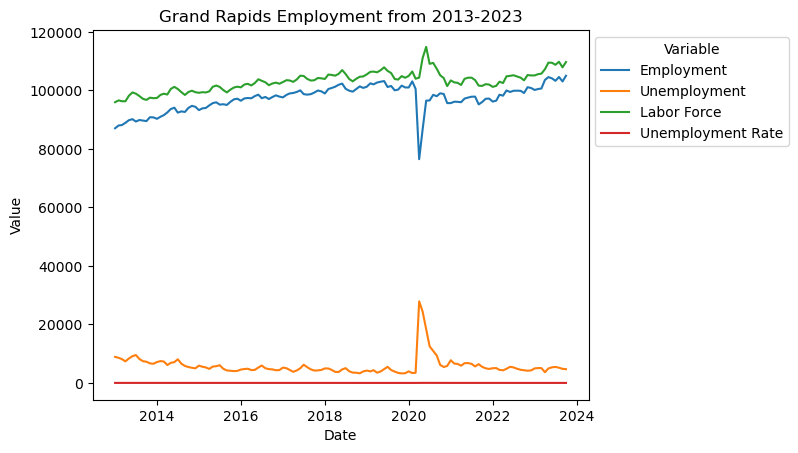

In [24]:
ax = sns.lineplot(gr,x='Date',y='Value',hue='Variable')
ax.set_title('Grand Rapids Employment from 2013-2023')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1));

c:\Users\anies\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anies\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


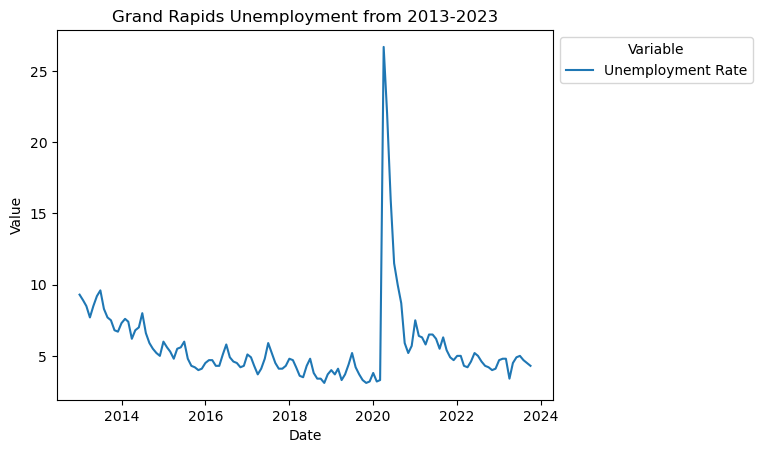

In [33]:
ax = sns.lineplot(gr[gr['Variable']=='Unemployment Rate'],x='Date',y='Value',hue='Variable')
ax.set_title('Grand Rapids Unemployment from 2013-2023')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1));

<Axes: >

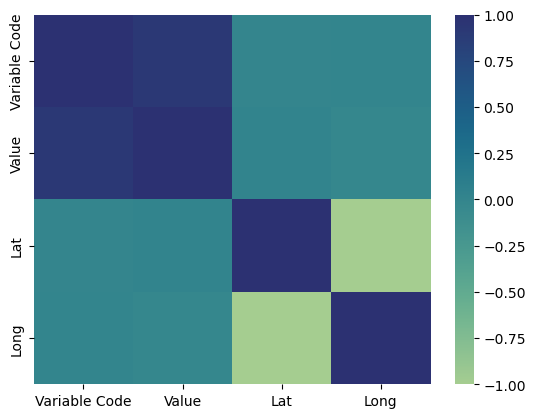

In [30]:
sns.heatmap(gr[['Variable Code','Value','Lat','Long']].corr(),cmap='crest')

In [1]:
import pandas as pd

In [2]:
col_names_1 = ['Label (Grouping)', "Total", "Total Margin of Error", "Percent", "Percent Margin of Error", "Male", "Male Margin of Error",
             "Male Percent", "Male Percent Margin of Error", "Female", "Female Margin of Error", "Female Percent", 
             "Female Percent Margin of Error"]
col_names_2 = ['Label (Grouping)', "Total", "Total Margin of Error", "Male", "Male Margin of Error",
             "Female", "Female Margin of Error"]

In [3]:
inc_2022 = pd.read_csv('ACSST5Y2022.csv',names = col_names_1, skiprows=[0])
inc_2021 = pd.read_csv('ACSST5Y2021.csv',names = col_names_1, skiprows=[0])
inc_2020 = pd.read_csv('ACSST5Y2020.csv',names = col_names_1, skiprows=[0])
inc_2019 = pd.read_csv('ACSST5Y2019.csv',names = col_names_1, skiprows=[0])
inc_2018 = pd.read_csv('ACSST5Y2018.csv',names = col_names_1, skiprows=[0])
inc_2017 = pd.read_csv('ACSST5Y2017.csv',names = col_names_1, skiprows=[0])
inc_2016 = pd.read_csv('ACSST5Y2016.csv',names = col_names_2, skiprows=[0])
inc_2015 = pd.read_csv('ACSST5Y2015.csv',names = col_names_2, skiprows=[0])
inc_2014 = pd.read_csv('ACSST5Y2014.csv',names = col_names_2, skiprows=[0])
inc_2013 = pd.read_csv('ACSST5Y2013.csv',names = col_names_2, skiprows=[0])
inc_2012 = pd.read_csv('ACSST5Y2012.csv',names = col_names_2, skiprows=[0])
inc_2011 = pd.read_csv('ACSST5Y2011.csv',names = col_names_2, skiprows=[0])
inc_2010 = pd.read_csv('ACSST5Y2010.csv',names = col_names_2, skiprows=[0])

In [7]:
for year in range(2010, 2017):
    globals()[f"range_{year}"] = globals()[f"inc_{year}"][2:12]
    globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [8]:
col_names = {'Percent': 'Total','Percent Margin of Error': 'Total Margin of Error',
             'Male Percent': 'Male','Male Percent Margin of Error': 'Male Margin of Error','Female Percent': 'Female',
                            	'Female Percent Margin of Error': 'Female Margin of Error'}

In [9]:
for year in range(2017, 2023):
    globals()[f"range_{year}"] = globals()[f"inc_{year}"][2:12][['Label (Grouping)','Percent','Percent Margin of Error','Male Percent',
                                                    'Male Percent Margin of Error','Female Percent','Female Percent Margin of Error']]
    globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
    globals()[f"range_{year}"] = globals()[f"range_{year}"].rename(columns=col_names)

In [10]:
full_time_salary_ranges = pd.concat([range_2022, range_2021, range_2020, range_2019, range_2018, range_2017, range_2016, range_2015, range_2014, range_2013,
           range_2012, range_2011, range_2010],ignore_index=True)

In [66]:
full_time_salary_ranges.loc[:,'Total'] = full_time_salary_ranges.loc[:,'Total'].str.replace(',', '').str.rstrip('%').astype(float)
full_time_salary_ranges.loc[:,'Male'] = full_time_salary_ranges.loc[:,'Male'].str.replace(',', '').str.rstrip('%').astype(float)
full_time_salary_ranges.loc[:,'Female'] = full_time_salary_ranges.loc[:,'Female'].str.replace(',', '').str.rstrip('%').astype(float)

full_time_salary_ranges.loc[:,'Total Margin of Error'] = full_time_salary_ranges.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)
full_time_salary_ranges.loc[:,'Male Margin of Error'] = full_time_salary_ranges.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)
full_time_salary_ranges.loc[:,'Female Margin of Error'] = full_time_salary_ranges.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)

In [67]:
full_time_salary_ranges

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,"FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS",69603.0,1601.0,38535.0,1181.0,31068.0,1189.0,2022
1,"$1 to $9,999 or loss",2.0,6.0,1.7,6.0,2.3,11.0,2022
2,"$10,000 to $14,999",1.9,6.0,1.5,7.0,2.3,9.0,2022
3,"$15,000 to $24,999",8.0,10.0,8.0,13.0,7.9,13.0,2022
4,"$25,000 to $34,999",13.5,11.0,11.9,11.0,15.5,17.0,2022
...,...,...,...,...,...,...,...,...
125,"$35,000 to $49,999",23.5,12.0,22.3,15.0,25.1,22.0,2010
126,"$50,000 to $64,999",13.6,10.0,15.2,15.0,11.7,15.0,2010
127,"$65,000 to $74,999",4.5,5.0,5.2,8.0,3.6,6.0,2010
128,"$75,000 to $99,999",5.1,6.0,5.9,9.0,4.1,9.0,2010


In [74]:
full_time_salary_ranges.to_csv('percentage_full_time_salary_ranges_clean.csv')

In [15]:
for year in range(2010, 2017):
    globals()[f"education_{year}"] = globals()[f"inc_{year}"][15:21]
    globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1060567082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1060567082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\1060567082.py:3: SettingWithCopyWarning: 
A value is try

In [19]:
for year in range(2017, 2023):
    globals()[f"education_{year}"] = globals()[f"inc_{year}"][15:21][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
    globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])

In [29]:
median_salary_per_education = pd.concat([education_2022, education_2021, education_2020, education_2019, education_2018, education_2017,
                                        education_2016, education_2015, education_2014, education_2013,education_2012, education_2011,
                                        education_2010],ignore_index=True)

In [60]:
median_salary_per_education.loc[:,'Total'] = median_salary_per_education.loc[:,'Total'].str.replace(',', '').astype(int)
median_salary_per_education.loc[:,'Male'] = median_salary_per_education.loc[:,'Male'].str.replace(',', '').astype(int)
median_salary_per_education.loc[:,'Female'] = median_salary_per_education.loc[:,'Female'].str.replace(',', '').astype(int)

median_salary_per_education.loc[:,'Total Margin of Error'] = median_salary_per_education.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary_per_education.loc[:,'Male Margin of Error'] = median_salary_per_education.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary_per_education.loc[:,'Female Margin of Error'] = median_salary_per_education.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)

In [61]:
median_salary_per_education

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,Population 25 years and over with earnings,42895,1124,47268,1483,38428,1264,2022
1,Less than high school graduate,26823,3708,33058,3779,21295,3492,2022
2,High school graduate (includes equival...,33742,2335,38888,2836,24740,4188,2022
3,Some college or associate's degree,37495,1783,43033,2508,31823,2405,2022
4,Bachelor's degree,54028,3139,61534,4341,48985,2053,2022
...,...,...,...,...,...,...,...,...
73,Less than high school graduate,16100,1075,17172,1193,13284,1845,2010
74,High school graduate (includes equivalency),23011,1277,25795,1214,19101,2249,2010
75,Some college or associate's degree,27329,1162,31427,1021,24140,1586,2010
76,Bachelor's degree,38416,1786,45934,1880,33036,2006,2010


In [75]:
median_salary_per_education.to_csv('median_salary_per_education_clean.csv')

In [35]:
for year in range(2010, 2017):
    globals()[f"median_{year}"] = globals()[f"inc_{year}"][0:2]
    globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_17072\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_17072\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [36]:
for year in range(2017, 2023):
    globals()[f"median_{year}"] = globals()[f"inc_{year}"][0:2][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
    globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])

In [54]:
median_salary = pd.concat([median_2022, median_2021, median_2020, median_2019, median_2018, median_2017,median_2016, median_2015, 
                           median_2014, median_2013,median_2012, median_2011,median_2010],ignore_index=True)

In [59]:
median_salary.loc[:,'Total'] = median_salary.loc[:,'Total'].str.replace(',', '').astype(int)
median_salary.loc[:,'Male'] = median_salary.loc[:,'Male'].str.replace(',', '').astype(int)
median_salary.loc[:,'Female'] = median_salary.loc[:,'Female'].str.replace(',', '').astype(int)

median_salary.loc[:,'Total Margin of Error'] = median_salary.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary.loc[:,'Male Margin of Error'] = median_salary.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary.loc[:,'Female Margin of Error'] = median_salary.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)


In [72]:
median_salary

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,Population 16 years and over with earnings,116002,1921,59669,1321,56333,1334,2022
1,Median earnings (dollars),35865,797,40405,1133,31363,1440,2022
2,Population 16 years and over with earnings,115173,1612,59670,1413,55503,1192,2021
3,Median earnings (dollars),31846,792,35421,1122,27511,1043,2021
4,Population 16 years and over with earnings,115411,1619,59950,1218,55461,1299,2020
5,Median earnings (dollars),29013,1039,32094,1034,25070,1033,2020
6,Population 16 years and over with earnings,114798,1184,59736,1179,55062,1061,2019
7,Median earnings (dollars),27482,631,30580,528,24431,961,2019
8,Population 16 years and over with earnings,112169,1253,57866,1245,54303,978,2018
9,Median earnings (dollars),26368,643,28988,1103,23325,884,2018


In [76]:
median_salary.to_csv('median_salary_clean.csv')

In [65]:
csvs = [inc_2010, inc_2011, inc_2012, inc_2013, inc_2014, inc_2015, inc_2016, inc_2017, inc_2018, inc_2019, inc_2020, inc_2021, inc_2022]
median = []
for csv in csvs:
        median.append(csv.loc[1,['Total','Total Margin of Error','Male','Male Margin of Error','Female','Female Margin of Error']])

In [66]:
medians = pd.DataFrame(median)

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
medians["Year"] = years
medians = medians.reset_index()
medians = medians.drop(columns=['index'])

In [67]:
medians

,Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,"21,930",±606,"24,740","±1,121","19,707","±1,255",2010
1,"22,160",±548,"24,763","±1,077","20,128",±790,2011
2,"22,408",±633,"25,373",±828,"20,464",±722,2012
3,"22,161",±581,"25,097",±924,"20,540",±750,2013
4,"22,169",±443,"25,525",±608,"20,236",±665,2014
5,"22,353",±471,"25,935",±659,"20,115",±564,2015
6,"22,721",±815,"25,904",±759,"20,598",±674,2016
7,"24,582",±654,"26,712",±640,"22,054",±698,2017
8,"26,368",±643,"28,988","±1,103","23,325",±884,2018
9,"27,482",±631,"30,580",±528,"24,431",±961,2019


In [68]:
medians.dtypes

Total                     object
Total Margin of Error     object
Male                      object
Male Margin of Error      object
Female                    object
Female Margin of Error    object
Year                       int64
dtype: object

In [69]:
for i in range(len(medians)):
    medians.loc[i,'Total'] = int(medians.loc[i,'Total'][0:2]+medians.loc[i,'Total'][3:6])
    medians.loc[i,'Male'] = int(medians.loc[i,'Male'][0:2]+medians.loc[i,'Male'][3:6])
    medians.loc[i,'Female'] = int(medians.loc[i,'Female'][0:2]+medians.loc[i,'Female'][3:6])

    len_total_error = len(medians.loc[i,'Total Margin of Error'][1:len(medians.loc[i,'Total Margin of Error'])])
    len_male_error = len(medians.loc[i,'Male Margin of Error'][1:len(medians.loc[i,'Male Margin of Error'])])
    len_female_error = len(medians.loc[i,'Female Margin of Error'][1:len(medians.loc[i,'Female Margin of Error'])])
    if len_total_error == 5:
        medians.loc[i,"Total Margin of Error"] = int(medians.loc[i,'Total Margin of Error'][1:len(medians.loc[i,'Total Margin of Error'])][0]+medians.loc[i,'Total Margin of Error'][1:len(medians.loc[12,'Total Margin of Error'])][2:6])
    else:
        medians.loc[i,'Total Margin of Error'] = int(medians.loc[i,'Total Margin of Error'][1:len(medians.loc[i,'Total Margin of Error'])])
    if len_male_error == 5:
        medians.loc[i,"Male Margin of Error"] = int(medians.loc[i,'Male Margin of Error'][1:len(medians.loc[i,'Male Margin of Error'])][0]+medians.loc[i,'Male Margin of Error'][1:len(medians.loc[12,'Male Margin of Error'])][2:6])
    else:
        medians.loc[i,'Male Margin of Error'] = int(medians.loc[i,'Male Margin of Error'][1:len(medians.loc[i,'Male Margin of Error'])])
    if len_female_error == 5:
        medians.loc[i,"Female Margin of Error"] = int(medians.loc[i,'Female Margin of Error'][1:len(medians.loc[i,'Female Margin of Error'])][0]+medians.loc[i,'Female Margin of Error'][1:len(medians.loc[12,'Female Margin of Error'])][2:6])
    else:
        medians.loc[i,'Female Margin of Error'] = int(medians.loc[i,'Female Margin of Error'][1:len(medians.loc[i,'Female Margin of Error'])])

In [70]:
medians

,Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,21930,606,24740,1121,19707,1255,2010
1,22160,548,24763,1077,20128,790,2011
2,22408,633,25373,828,20464,722,2012
3,22161,581,25097,924,20540,750,2013
4,22169,443,25525,608,20236,665,2014
5,22353,471,25935,659,20115,564,2015
6,22721,815,25904,759,20598,674,2016
7,24582,654,26712,640,22054,698,2017
8,26368,643,28988,1103,23325,884,2018
9,27482,631,30580,528,24431,961,2019


In [90]:
medians.to_csv('Income_Medians_Clean.csv')

In [71]:
import matplotlib.pyplot as plt
import numpy as np

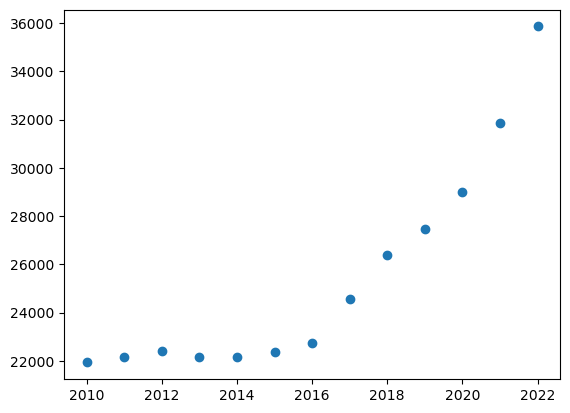

In [72]:
plt.scatter(medians.Year,medians.Total)

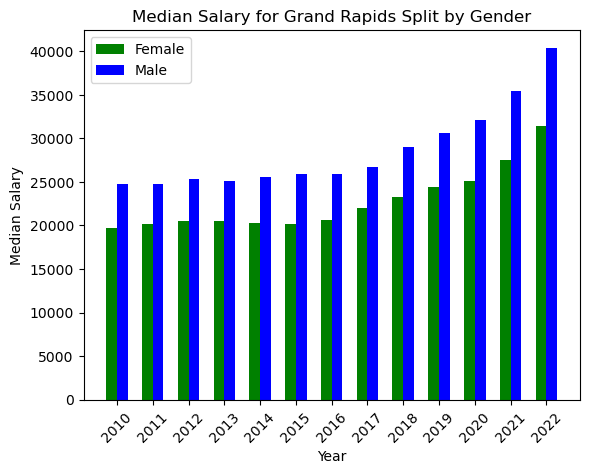

In [88]:
X = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Ygirls = medians.Female
Zboys = medians.Male
  
X_axis = np.arange(len(X))*2
  
plt.bar(X_axis - 0.3, Ygirls, 0.6, label = 'Female',color='Green') 
plt.bar(X_axis + 0.3, Zboys, 0.6, label = 'Male',color='Blue') 
  
plt.xticks(X_axis, X,rotation=45) 
plt.xlabel("Year") 
plt.ylabel("Median Salary") 
plt.title("Median Salary for Grand Rapids Split by Gender") 
plt.legend() 
plt.show() 

In [82]:
X_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])